In [1]:
import sys
import tqdm

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
np.random.seed(42)

# Figure 5.1

In [3]:
cards = np.array([1,2,3,4,5,6,7,8,9,10,10,10,10])
pi = 20

In [4]:
def get_sum(cards):
    total = np.sum(cards)
    if 1 in cards:
        if total + 10 <= 21:
            return total + 10, True
        else:
            return total, False
    return total, False

def generate_episode(state_list = [], pi = 20):
    # Initialize player cards
    player_cards = np.random.choice(cards,2)
    player_sum, ace_usable = get_sum(player_cards)
    
    # Initialize dealer cards
    dealer_cards = np.random.choice(cards,2)
    dealer_sum, _ = get_sum(dealer_cards)
    dealer_show_card = dealer_cards[0]
    
    s = (player_sum, dealer_show_card, ace_usable)
    state_list.append(s)

    # Player policy to hit until sum is greater than equal to 20
    while(player_sum < pi):
        state_list.append('hit')
        player_cards = np.append(player_cards, np.random.choice(cards))
        player_sum, ace_usable = get_sum(player_cards)
        if player_sum > 21:
            state_list.append(('reward', -1))
            return state_list
        state_list.append(('reward', 0))
        s = (player_sum, dealer_show_card, ace_usable)
        state_list.append(s)
        
    state_list.append('stick')
    
    while(dealer_sum < 17):
        dealer_cards = np.append(dealer_cards, np.random.choice(cards))
        dealer_sum, _ = get_sum(dealer_cards)
        if dealer_sum > 21:
            state_list.append(('reward', 1))
            return state_list
    
    # If both stick then compare their sums to decide the winner
    if player_sum > dealer_sum:
        state_list.append(('reward', 1))
        return state_list
    elif player_sum < dealer_sum:
        state_list.append(('reward', -1))
        return state_list
    state_list.append(('reward', 0))
    
    # Return epside list of the form S_0, A_0, R_1, S_1 ..... R_t-1
    return state_list

def get_Z(x, y, usable_ace):
    if (x, y, usable_ace) in value_function.keys():
        return value_function[x, y, usable_ace]
    else:
        return 0

#### Code to generate estimates for state-action pair for 10000

In [5]:
return_state = {} # For state s, we have avg(return),count(s)
state_value_function = {}
max_iter = 10000

for j in tqdm.trange(max_iter):
    # Generate a random episode
    state_sequence = generate_episode([])
    original = state_sequence.copy()
    
    # Reverse the episode list
    state_sequence.reverse()
    
    # Expected return
    g = 0
    
    # Iterate over the episode in reverse direction
    for i in range(len(state_sequence)):
        if state_sequence[i][0] == 'reward':
            state = state_sequence[i+2]
            action = state_sequence[i+1]
            
            g += state_sequence[i][1] # Since gamma is 1, so simply add it
            
            # For each (state, action) pair save the current average return and count
            if (state,action) in return_state.keys():
                # Update the return as return = avg_return + 1/n(reward - avg_return)
                r, count = return_state[state, action]
                r = (r * count + g) / (count + 1)
                return_state[state, action] = [r, count + 1]
            else:
                return_state[state, action] = [g, 1]
            
            state_value_function[state, action] = return_state[state, action][0]

100%|██████████| 10000/10000 [00:01<00:00, 5024.20it/s]


#### Code to generate estimates for value function for 10000

In [6]:
return_state = {} # For state s, we have avg(return),count(s)
value_function = {}
max_iter = 10000
    
for j in tqdm.trange(max_iter):
    # Generate a random episode
    state_sequence = generate_episode([])
    original = state_sequence.copy()
    
    # Reverse the episode list
    state_sequence.reverse()
    
    # Expected return
    g = 0
    
    # Iterate over the episode in reverse direction
    for i in range(len(state_sequence)):
        if state_sequence[i][0] == 'reward':
            state = state_sequence[i+2]

            g += state_sequence[i][1]
            
            # For each state save the current average return and count
            if state in return_state.keys():
                # Update the return as return = avg_return + 1/n(reward - avg_return)
                r, count = return_state[state]
                r = (r * count + g) / (count + 1)
                return_state[state] = [r, count + 1]
            else:
                return_state[state] = [g, 1]
            
            value_function[state] = return_state[state][0]

100%|██████████| 10000/10000 [00:02<00:00, 4959.65it/s]


#### Plot for usable and non-usable ace for 10000 iterations

In [7]:
# Code for plotting
X = np.array([i for i in range(12,22)])
Y = np.array([i for i in range(1,11)])
X,Y = np.meshgrid(X,Y)

z_true = np.array([get_Z(x, y, True) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
z_false = np.array([get_Z(x, y, False) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

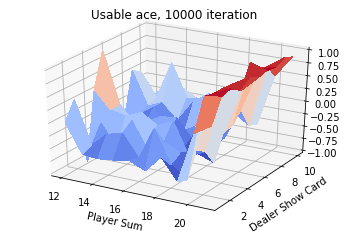

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('Usable ace, 10000 iteration')
ax.set_xlabel('Player Sum')
ax.set_ylabel('Dealer Show Card')
surf = ax.plot_surface(X, Y, z_true, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.savefig('5.1 10000 useable_ace.png')

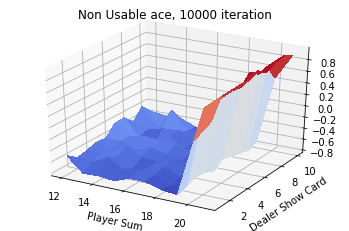

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('Non Usable ace, 10000 iteration')
ax.set_xlabel('Player Sum')
ax.set_ylabel('Dealer Show Card')
surf = ax.plot_surface(X, Y, z_false, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.savefig('5.1 10000 non_useable_ace.png')

#### Code to generate estimates for state-action value function for 500000

In [10]:
return_state = {} # For state s, we have avg(return),count(s)
state_value_function = {}
max_iter = 500000

for j in tqdm.trange(max_iter):
    # Generate a random episode
    state_sequence = generate_episode([])
    original = state_sequence.copy()
    
    # Reverse the episode list
    state_sequence.reverse()
    
    # Expected return
    g = 0
    
    # Iterate over the episode in reverse direction
    for i in range(len(state_sequence)):
        if state_sequence[i][0] == 'reward':
            state = state_sequence[i+2]
            action = state_sequence[i+1]

            g += state_sequence[i][1]
            
            # For each (state,action) save the current average return and count
            if (state,action) in return_state.keys():
                # Update the return as return = avg_return + 1/n(reward - avg_return)
                r, count = return_state[state, action]
                r = (r * count + g) / (count + 1)
                return_state[state, action] = [r, count + 1]
            else:
                return_state[state, action] = [g, 1]
            
            state_value_function[state, action] = return_state[state, action][0]

100%|██████████| 500000/500000 [01:39<00:00, 5027.31it/s]


#### Code to generate estimates for value function for 500000

In [11]:
return_state = {} # For state s, we have avg(return),count(s)
value_function = {}
max_iter = 500000
    
for j in tqdm.trange(max_iter):
    # Generate a random episode
    state_sequence = generate_episode([])
    original = state_sequence.copy()
    
    # Reverse the episode list
    state_sequence.reverse()
    
    # Expected return
    g = 0
    
    # Iterate over the episode in reverse direction
    for i in range(len(state_sequence)):
        if state_sequence[i][0] == 'reward':
            state = state_sequence[i+2]

            g += state_sequence[i][1]
            
            # For each state save the current average return and count
            if state in return_state.keys():
                # Update the return as return = avg_return + 1/n(reward - avg_return)
                r, count = return_state[state]
                r = (r * count + g) / (count + 1)
                return_state[state] = [r, count + 1]
            else:
                return_state[state] = [g, 1]
            
            value_function[state] = return_state[state][0]

100%|██████████| 500000/500000 [01:38<00:00, 5088.25it/s]


#### Plots for usable and non-usable ace for 500000 iterations

In [12]:
X = np.array([i for i in range(12,22)])
Y = np.array([i for i in range(1,11)])
X,Y = np.meshgrid(X,Y)

z_true = np.array([get_Z(x, y, True) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
z_false = np.array([get_Z(x, y, False) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

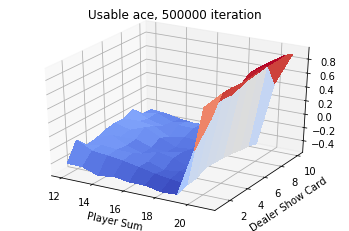

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('Usable ace, 500000 iteration')
ax.set_xlabel('Player Sum')
ax.set_ylabel('Dealer Show Card')
surf = ax.plot_surface(X, Y, z_true, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.savefig('5.1 500000 useable_ace.png')

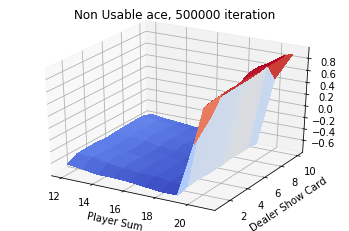

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('Non Usable ace, 500000 iteration')
ax.set_xlabel('Player Sum')
ax.set_ylabel('Dealer Show Card')
surf = ax.plot_surface(X, Y, z_false, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.savefig('5.1 500000 non_useable_ace.png')

# Exercise 5.4 and generating figure 5.2

In [15]:
# All codes to initialize Q, pi
def generate_states_action():
    all_states = []
    action = {}
    
    for i in range(4,22):
            for k in range(1,11):
                for l in [True, False]:
                    all_states.append((i,l,k))
                    if (i,l,k) not in action.keys():
                        action[(i,l,k)] = ['hit', 'stick']
    return all_states, action

def initialize_policy(all_states):
    pi = {}
    for i in all_states:
        if i[0] < 20:
            pi[i] = 'hit'
        else:
            pi[i] = 'stick'
    return pi

def initialize_state_value(all_states, actions):
    state_value_function = {}
    for i in all_states:
        for j in actions[i]:
            state_value_function[i,j] = 0
    return state_value_function

In [16]:
# Updated code for getting sum different from the one used earlier
def get_sum_ES(old_sum, useable_ace, new_card):
    total = old_sum + new_card
    if useable_ace == False and new_card == 1:
        if total + 10 <= 21:
            return total + 10, True
        else:
            return total, useable_ace
    elif useable_ace == True:
        if total > 21:
            return total - 10, False
    return total, useable_ace

# Function for generating the episode which follows the player policy, pi
def generate_episode_ES(pi, all_states, actions, state_list = []):
    s = all_states[np.random.randint(0, len(all_states))]
    state_list.append(s)
    action = actions[s][np.random.randint(0,2)]
    state_list.append(action)
    
    dealer_cards = np.array([s[2], np.random.choice(cards)])
    dealer_sum, _ = get_sum(dealer_cards)
    
    if action == 'stick':
        while(dealer_sum < 17):
            dealer_cards = np.append(dealer_cards, np.random.choice(cards))
            dealer_sum, _ = get_sum(dealer_cards)
            if dealer_sum > 21:
                state_list.append(('reward', 1))
                return state_list

        # If both stick then compare their sums to decide the winner
        if s[0] > dealer_sum:
            state_list.append(('reward', 1))
            return state_list
        elif s[0] < dealer_sum:
            state_list.append(('reward', -1))
            return state_list
        state_list.append(('reward', 0))
        return state_list
    
    else:
        new_card = np.random.choice(cards)
        player_sum, ace_usable = get_sum_ES(s[0], s[1], new_card)
        if player_sum > 21:
            state_list.append(('reward', -1))
            return state_list
        state_list.append(('reward', 0))
        s = (player_sum, ace_usable, s[2])
        state_list.append(s)
        while pi[s] == 'hit':
            state_list.append(pi[s])
            new_card = np.random.choice(cards)
            player_sum, ace_usable = get_sum_ES(s[0], s[1], new_card)
            if player_sum > 21:
                state_list.append(('reward', -1))
                return state_list
            state_list.append(('reward', 0))
            s = (player_sum, ace_usable, s[2])
            state_list.append(s)
        
        state_list.append(pi[s])
        while(dealer_sum < 17):
            dealer_cards = np.append(dealer_cards, np.random.choice(cards))
            dealer_sum, _ = get_sum(dealer_cards)
            if dealer_sum > 21:
                state_list.append(('reward', 1))
                return state_list

        # If both stick then compare their sums to decide the winner
        if s[0] > dealer_sum:
            state_list.append(('reward', 1))
            return state_list
        elif s[0] < dealer_sum:
            state_list.append(('reward', -1))
            return state_list
        state_list.append(('reward', 0))
        return state_list

In [27]:
return_state = {} # For state s, we have avg(return),count(s)
max_iter = 500000

all_states, actions = generate_states_action()
state_value_function = initialize_state_value(all_states, actions)
pi = initialize_policy(all_states)

for j in tqdm.trange(max_iter):
    state_sequence = generate_episode_ES(pi, all_states, actions,[])
    original = state_sequence.copy()
    state_sequence.reverse()
    
    g = 0
    
    for i in range(len(state_sequence)):
        if state_sequence[i][0] == 'reward':
            state = state_sequence[i+2]
            action = state_sequence[i+1]

            g += state_sequence[i][1]
            
            if (state,action) in return_state.keys():
                r, count = return_state[state, action]
                r = (r * count + g) / (count + 1)
                return_state[state, action] = [r, count + 1]
            else:
                return_state[state, action] = [g, 1]
            
            state_value_function[state, action] = return_state[state, action][0]
            # Code above is same as before for generating figure 5.1
            
            # Update pi
            if state_value_function[state, action] > state_value_function[state, pi[state]]:
                pi[state] = action

100%|██████████| 500000/500000 [00:54<00:00, 9140.81it/s]


In [28]:
z_useable = np.zeros((11,10))
z_non_useable = np.zeros((11,10))

for i in pi.keys():
    s, useable_ace, dealer = i
    if s > 10:
        if useable_ace:
            if pi[i] == 'hit':
                z_useable[s-11,dealer-1] = 0
            else:
                z_useable[s-11,dealer-1] = 1
        else:
            if pi[i] == 'hit':
                z_non_useable[s-11,dealer-1] = 0
            else:
                z_non_useable[s-11,dealer-1] = 1

In [29]:
z_final_useable = np.copy(z_useable)
z_final_non_useable = np.copy(z_non_useable)

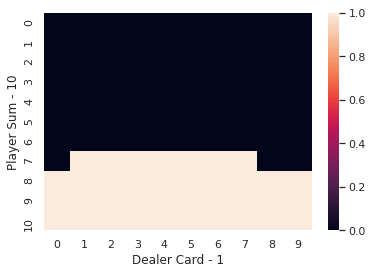

In [30]:
sns.set()
fig = plt.figure()
ax = sns.heatmap(z_useable)
ax.set_xlabel('Dealer Card - 1')
ax.set_ylabel('Player Sum - 10')
fig.savefig('final_useable_ace.png')

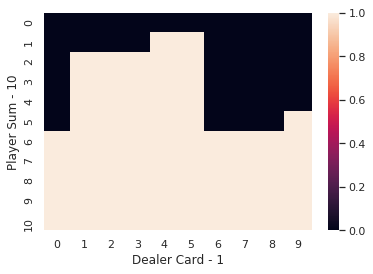

In [31]:
sns.set()
fig = plt.figure()
ax = sns.heatmap(z_non_useable)
ax.set_xlabel('Dealer Card - 1')
ax.set_ylabel('Player Sum - 10')
fig.savefig('final_non_useable_ace.png')

# Figure 5.3

In [72]:
# Initialization code for Q, pi
def generate_states_action():
    all_states = []
    action = {}
    for i in range(4,22):
            for k in range(1,11):
                for l in [True, False]:
                    all_states.append((i,l,k))
                    if (i,l,k) not in action.keys():
                        action[(i,l,k)] = ['hit', 'stick']
    return all_states, action

def initialize_target_policy(all_states):
    pi = {}
    for i in all_states:
        if i[0] >= 20:
            pi[i] = 'stick'
        else:
            pi[i] = 'hit'
    return pi

def initialize_state_value_imp(all_states, actions):
    state_value_function = {}
    for i in all_states:
        for j in actions[i]:
            state_value_function[i,j] = 0
    return state_value_function

def initialize_count(all_states, actions):
    count = {}
    for i in all_states:
        for j in actions[i]:
            count[i,j] = 0
    return count

def get_sum_importance(old_sum, useable_ace, new_card):
    total = old_sum + new_card
    if useable_ace == False and new_card == 1:
        if total + 10 <= 21:
            return total + 10, True
        else:
            return total, useable_ace
    elif useable_ace == True:
        if total > 21:
            return total - 10, False
    return total, useable_ace

In [73]:
# Episode generating for importance sampling based on behaviour policy which is to select a random action
def generate_episode_importance(pi, all_states, actions, start_state, state_list = []):
    s = start_state
    
    state_list.append(s)
    action = actions[s][np.random.randint(0,2)]
    state_list.append(action)
    
    dealer_cards = np.array([s[2], np.random.choice(cards)])
    dealer_sum, _ = get_sum(dealer_cards)
    
    if action == 'stick':
        while(dealer_sum < 17):
            dealer_cards = np.append(dealer_cards, np.random.choice(cards))
            dealer_sum, _ = get_sum(dealer_cards)
            if dealer_sum > 21:
                state_list.append(('reward', 1))
                return state_list

        # If both stick then compare their sums to decide the winner
        if s[0] > dealer_sum:
            state_list.append(('reward', 1))
            return state_list
        elif s[0] < dealer_sum:
            state_list.append(('reward', -1))
            return state_list
        state_list.append(('reward', 0))
        return state_list
    
    else:
        new_card = np.random.choice(cards)
        player_sum, ace_usable = get_sum_importance(s[0], s[1], new_card)
        if player_sum > 21:
            state_list.append(('reward', -1))
            return state_list
        state_list.append(('reward', 0))
        s = (player_sum, ace_usable, s[2])
        state_list.append(s)
        
        action = actions[s][np.random.randint(0,2)]
        while action == 'hit':
            state_list.append(action)
            new_card = np.random.choice(cards)
            player_sum, ace_usable = get_sum_importance(s[0], s[1], new_card)
            if player_sum > 21:
                state_list.append(('reward', -1))
                return state_list
            state_list.append(('reward', 0))
            s = (player_sum, ace_usable, s[2])
            state_list.append(s)
        
        state_list.append(action)
        while(dealer_sum < 17):
            dealer_cards = np.append(dealer_cards, np.random.choice(cards))
            dealer_sum, _ = get_sum(dealer_cards)
            if dealer_sum > 21:
                state_list.append(('reward', 1))
                return state_list

        # If both stick then compare their sums to decide the winner
        if s[0] > dealer_sum:
            state_list.append(('reward', 1))
            return state_list
        elif s[0] < dealer_sum:
            state_list.append(('reward', -1))
            return state_list
        state_list.append(('reward', 0))
        return state_list

#### Oridinary Importance Sampling

In [74]:
runs = 100
max_iter = 10000

value_13_useable_2_ordinary = np.zeros((runs,max_iter))
true_value = -0.27726

for run in tqdm.trange(runs):
    all_states, actions = generate_states_action()
    state_value_function = initialize_state_value_imp(all_states, actions)
    count_s_a = initialize_count(all_states, actions)
    pi = initialize_target_policy(all_states)
    start_state = (13, True, 2)
    
    for j in range(max_iter):
        state_sequence = generate_episode_importance(pi, all_states, actions, start_state, [])
        original = state_sequence.copy()
        state_sequence.reverse()

        g = 0
        w = 1
        for i in range(len(state_sequence)):
            if state_sequence[i][0] == 'reward':
                state = state_sequence[i+2]
                action = state_sequence[i+1]

                g += state_sequence[i][1]
                count_s_a[state,action] += 1 # C(S,A) = count
                
                # Update rule
                state_value_function[state, action] += (w / (count_s_a[state,action])) * (g - state_value_function[state, action])
                
                if pi[state] == action:
                    p = 1
                else:
                    p = 0
                w = w * 2 * p # W *= pi / b
        value_13_useable_2_ordinary[run][j] += (state_value_function[start_state, 'hit'] - true_value) ** 2

value_13_useable_2_ordinary = np.mean(value_13_useable_2_ordinary, axis=0)

100%|██████████| 100/100 [02:03<00:00,  1.23s/it]


#### Weighted Importance Sampling

In [75]:
runs = 100
max_iter = 10000

value_13_useable_2_weighted = np.zeros((runs,max_iter))
true_value = -0.27726

for run in tqdm.trange(runs):
    all_states, actions = generate_states_action()
    state_value_function = initialize_state_value_imp(all_states, actions)
    count_s_a = initialize_count(all_states, actions)
    pi = initialize_target_policy(all_states)
    start_state = (13, True, 2)
    
    for j in range(max_iter):
        state_sequence = generate_episode_importance(pi, all_states, actions, start_state, [])
        original = state_sequence.copy()
        state_sequence.reverse()

        g = 0
        w = 1
        for i in range(len(state_sequence)):
            if state_sequence[i][0] == 'reward':
                state = state_sequence[i+2]
                action = state_sequence[i+1]

                g += state_sequence[i][1]
                count_s_a[state,action] += w # Count = Count + w
                
                # Update Rule
                state_value_function[state, action] += (w / (count_s_a[state,action] + 1.0e-5)) * (g - state_value_function[state, action])
                
                # Determine probability for current action
                if pi[state] == action:
                    p = 1
                else:
                    p = 0
                w = w * 2 * p # W *= pi / b
        value_13_useable_2_weighted[run][j] += (state_value_function[start_state, 'hit'] - true_value) ** 2

value_13_useable_2_weighted = np.mean(value_13_useable_2_weighted, axis=0)

100%|██████████| 100/100 [02:04<00:00,  1.20s/it]


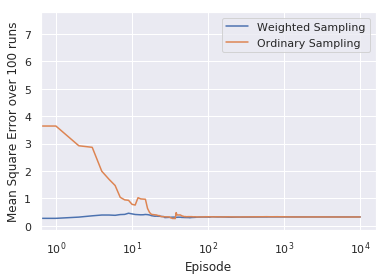

In [101]:
plt.plot(value_13_useable_2_weighted, label='Weighted Sampling')
plt.plot(value_13_useable_2_ordinary[12:], label='Ordinary Sampling')
plt.ylabel('Mean Square Error over 100 runs')
plt.xlabel('Episode')
plt.legend()
plt.xscale('log')
plt.savefig('5.3_log_t.png')
plt.show()

# Figure 6.2

In [105]:
pi = np.array([-1, 1])
num_states = 7
start_state = 3 
terminal_states = 0,6

#### TD(0)

In [33]:
def td_0(step_size, steps=100, runs=100):
    # Running the code for 100 runs, each runs having 100 episodes
    run_rmse = np.zeros((runs, steps))
    for j in range(runs):
        rmse = []
        v_true_value = np.array([1/6, 2/6, 3/6, 4/6, 5/6])
        v_true_value = v_true_value.reshape(v_true_value.shape[0],1)
        v_estimate = np.zeros((num_states,1))
        v_estimate[1:6] += 0.5
        for i in range(steps):
            s = start_state
            while s not in terminal_states:
                action = np.random.choice(pi)
                s_new = s + action
                # Update rule: V[s] = V[s] + alpha(G + V[s_new] - V[s])
                if s_new == 6:
                    v_estimate[s] += step_size * (1 + v_estimate[s_new] - v_estimate[s]) 
                else:
                    v_estimate[s] += step_size * (v_estimate[s_new] - v_estimate[s])
                s = s_new
            rmse.append(np.sqrt(np.mean((v_true_value - v_estimate[1:6]) ** 2)))    
        rmse = np.array(rmse)
        run_rmse[j] = rmse
    return np.mean(run_rmse, axis=0), v_estimate[1:6], v_true_value

In [34]:
rmse_0_1, _, _ = td_0(0.1, 100)
rmse_00_5, _, _ = td_0(0.05, 100)
rmse_0_15, _, _ = td_0(0.15, 100)

In [35]:
_, v_estimate_0, v_true = td_0(0.1, 0)
_, v_estimate_1, v_true = td_0(0.1, 1)
_, v_estimate_10, v_true = td_0(0.1, 10)
_, v_estimate_100, v_true = td_0(0.1, 100)

#### Plots for value function, true and estimated

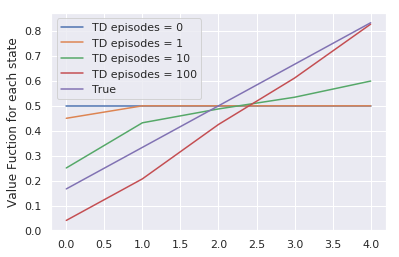

In [36]:
plt.plot(v_estimate_0, label='TD episodes = 0')
plt.plot(v_estimate_1, label='TD episodes = 1')
plt.plot(v_estimate_10, label='TD episodes = 10')
plt.plot(v_estimate_100, label='TD episodes = 100')
plt.plot(v_true, label='True')
plt.ylabel('Value Fuction for each state')
plt.legend()
plt.savefig('Value Fuction TD.png')
plt.show()

#### Plots for RMSE for TD(0)

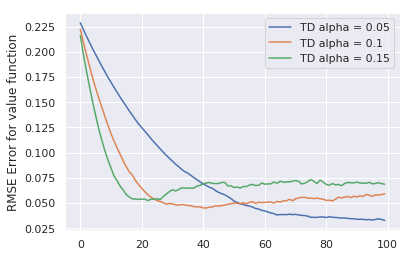

In [37]:
plt.plot(rmse_00_5, label='TD alpha = 0.05')
plt.plot(rmse_0_1, label='TD alpha = 0.1')
plt.plot(rmse_0_15, label='TD alpha = 0.15')
plt.ylabel('RMSE Error for value function')
plt.legend()
plt.savefig('RMSE TD.png')
plt.show()

#### MC with constant alpha

In [109]:
def mc_every_visit(step_size, steps=100, runs=100):
    # Running the code for 100 runs, each runs having 100 episodes
    run_rmse = np.zeros((runs, steps))
    for j in range(runs):
        rmse = []
        v_true_value = np.array([1/6, 2/6, 3/6, 4/6, 5/6])
        v_true_value = v_true_value.reshape(v_true_value.shape[0],1)
        v_estimate = np.zeros((num_states,1))
        v_estimate[1:6] += 0.5

        for i in range(steps):
            # Episode generation code
            episode = []
            s = start_state
            while s not in terminal_states:
                episode.append(s)
                action = np.random.choice(pi)
                episode.append(action)
                s_new = s + action
                if s_new == 6:
                    episode.append(1)
                else:
                    episode.append(0)
                s = s_new
            episode.append(s)
            episode.reverse()
            
            g = 0
            
            for i in range(len(episode)):
                # Update rule: V[s] = V[s] + alpha * (G - V[s])
                g += episode[i-1]
                if i % 3 == 2:
                    v_estimate[episode[i+1]] += step_size * (episode[i-1] + v_estimate[episode[i-2]] - v_estimate[episode[i+1]])
            rmse.append(np.sqrt(np.mean((v_true_value - v_estimate[1:6]) ** 2)))
        rmse = np.array(rmse)
        run_rmse[j] = rmse
    return np.mean(run_rmse, axis=0)

In [110]:
mc_0_01 = mc_every_visit(0.01, 100)
mc_0_02 = mc_every_visit(0.02, 100)
mc_0_03 = mc_every_visit(0.03, 100)
mc_0_04 = mc_every_visit(0.04, 100)

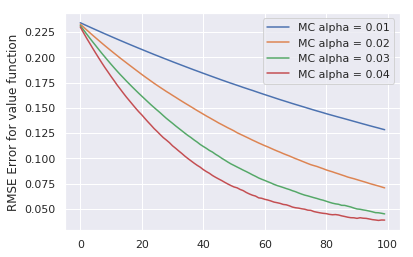

In [111]:
plt.plot(mc_0_01, label='MC alpha = 0.01')
plt.plot(mc_0_02, label='MC alpha = 0.02')
plt.plot(mc_0_03, label='MC alpha = 0.03')
plt.plot(mc_0_04, label='MC alpha = 0.04')
plt.ylabel('RMSE Error for value function')
plt.legend()
plt.savefig('MC.png')
plt.show()

# Compare the sum of rewards during episodes when using Q-learning and SARSA for Cliff Walking

In [45]:
grid = np.zeros((4,12)) - 1 # Actual grid with cell value = reward
grid[3,1:11] = -100 # Cliff

start_state = 3,0
terminal_state = 3,11

actions = [(-1,0), (1,0), (0,1), (0, -1)] # Set of actions i.e. left, right, up, down
print(grid)

[[  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.]
 [  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.]
 [  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.]
 [  -1. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.   -1.]]


In [46]:
def inside(grid_shape, new_location):
    H,W = grid_shape
    if(new_location[0]<0):
        return False
    if(new_location[0]>=H):
        return False
    if(new_location[1]<0):
        return False
    if(new_location[1]>=W):
        return False
    return True

def argmax(q_s_a, s):
    max_val = -np.inf
    pos = np.random.randint(0, len(actions))
    for a in range(len(actions)):
        if max_val < q_s_a[s[0], s[1], actions[a]]:
            max_val = q_s_a[s[0], s[1], actions[a]]
            pos = a
    return pos

#### SARSA

In [54]:
runs = 100
steps = 500
epsilon = 0.1
step_size = 0.1

list_sum_rewards_sarsa = np.zeros((runs, steps))

# Initialize Q
for run in tqdm.trange(runs):
    q_s_a = {}
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            for k in actions:
                if (i,j) == terminal_state:
                    q_s_a[i,j,k] = 0
                else:
                    q_s_a[i,j,k] = np.random.rand()

    for i in range(steps):
        s = start_state
        x = np.random.rand()
        if x > epsilon:
            a = argmax(q_s_a, s)
        else:
            a = np.random.randint(0, len(actions))
        
        sum_rewards = 0
        while s != terminal_state:
            new_location = s[0] + actions[a][0], s[1] + actions[a][1]
            if inside(grid.shape, new_location):
                s_new = new_location
            else:
                s_new = s[0], s[1]

            sum_rewards += grid[s_new]
            if grid[s_new] == -100:
                s_new = start_state
            
            # Select next action using epsilon-greedy
            x = np.random.rand()
            if x > epsilon:
                a_new = argmax(q_s_a, s_new)
            else:
                a_new = np.random.randint(0, len(actions))
            
            # Update rule
            q_s_a[s[0], s[1], actions[a]] += step_size * (grid[s_new] + q_s_a[s_new[0], s_new[1], actions[a_new]] - q_s_a[s[0], s[1], actions[a]])
            s = s_new[0], s_new[1]
            a = a_new
        
        if sum_rewards < -100:
            sum_rewards = -100
        list_sum_rewards_sarsa[run][i] = sum_rewards

100%|██████████| 100/100 [00:20<00:00,  5.04it/s]


#### Q - Learning

In [53]:
runs = 100
steps = 500
epsilon = 0.1
step_size = 0.1

list_sum_rewards_q = np.zeros((runs,steps))

# Initializa Q
for run in tqdm.trange(runs):
    q_s_a = {}
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            for k in actions:
                if (i,j) == terminal_state:
                    q_s_a[i,j,k] = 0
                else:
                    q_s_a[i,j,k] = np.random.rand()

    for i in range(steps):
        s = start_state
        
        sum_rewards = 0
        while s != terminal_state:
            x = np.random.rand()
            if x > epsilon:
                a = argmax(q_s_a, s)
            else:
                a = np.random.randint(0, len(actions))

            new_location = s[0] + actions[a][0], s[1] + actions[a][1]
            if inside(grid.shape, new_location):
                s_new = new_location
            else:
                s_new = s[0], s[1]

            sum_rewards += grid[s_new]
            if grid[s_new] == -100:
                s_new = start_state
            
            # Select the best action
            a_new = argmax(q_s_a, s_new)
            
            # Update rule
            q_s_a[s[0], s[1], actions[a]] += step_size * (grid[s_new] + q_s_a[s_new[0], s_new[1], actions[a_new]] - q_s_a[s[0], s[1], actions[a]])

            s = s_new[0], s_new[1]
        
        if sum_rewards < -100:
            sum_rewards = -100
        list_sum_rewards_q[run][i] = sum_rewards

100%|██████████| 100/100 [00:27<00:00,  3.64it/s]


In [55]:
list_sum_rewards_sarsa = np.mean(list_sum_rewards_sarsa, axis=0)
list_sum_rewards_q = np.mean(list_sum_rewards_q, axis=0)

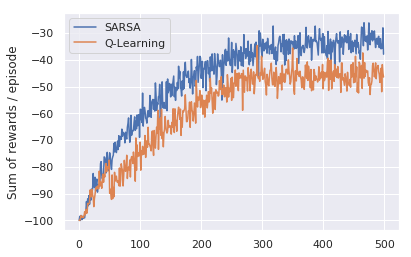

In [102]:
plt.plot(list_sum_rewards_sarsa, label='SARSA')
plt.plot(list_sum_rewards_q, label='Q-Learning')
plt.ylabel('Sum of rewards / episode')
plt.legend()
plt.savefig('Comparison of SARSA and Q-Learning.png')
plt.show()